<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizations</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation Analysis</a></span></li><li><span><a href="#Dynamic-Regression-Model" data-toc-modified-id="Dynamic-Regression-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dynamic Regression Model</a></span><ul class="toc-item"><li><span><a href="#Zone1" data-toc-modified-id="Zone1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Zone1</a></span></li><li><span><a href="#Zone2" data-toc-modified-id="Zone2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Zone2</a></span></li><li><span><a href="#Zone3" data-toc-modified-id="Zone3-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Zone3</a></span></li></ul></li></ul></div>

## Packages

In [1]:
install.packages("fpp3")
library(fpp3)
install.packages("DataExplorer")
library(DataExplorer)
install.packages('readr', dependencies = TRUE, repos='http://cran.rstudio.com/')
install.packages("hydroTSM")                       
library("hydroTSM")
install.packages("corrplot")
library(corrplot)
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'fpp3' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.8      ✔ tsibble     1.1.3 
✔ dplyr       1.0.10     ✔ tsibbledata 0.4.1 
✔ tidyr       1.3.0      ✔ feasts      0.3.0 
✔ lubridate   1.9.1      ✔ fable       0.3.2 
✔ ggplot2     3.4.0      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'hydroTSM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


Loading required package: zoo


Attaching package: 'zoo'


The following object is masked from 'package:tsibble':

    index


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'hydroTSM'


The following object is masked from 'package:tidyr':

    extract


Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


corrplot 0.92 loaded

Installing package into 'C:/Users/anton/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anton\AppData\Local\Temp\RtmpczuoDa\downloaded_packages


In [2]:
consumption <- readr::read_csv("C:\\Users\\anton\\Desktop\\powerconsumption.csv")

Rows: 52416 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Datetime
dbl (8): Temperature, Humidity, WindSpeed, GeneralDiffuseFlows, DiffuseFlows...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#convert DateTime
consumption$Datetime=strptime(consumption$Datetime, format="%m/%d/%Y %H:%M")

In [4]:
#checking NA values
sum(is.na(consumption$Datetime))

[1] 6

In [5]:
# removing rows with NA values (6 rows)
consumption <- consumption[rowSums(is.na(consumption)) == 0, ] 

In [6]:
consumption %>% glimpse(80)

Rows: 52,410
Columns: 9
$ Datetime               <dttm> 2017-01-01 00:00:00, 2017-01-01 00:10:00, 2017…
$ Temperature            <dbl> 6.559, 6.414, 6.313, 6.121, 5.921, 5.853, 5.641…
$ Humidity               <dbl> 73.8, 74.5, 74.5, 75.0, 75.7, 76.9, 77.7, 78.2,…
$ WindSpeed              <dbl> 0.083, 0.083, 0.080, 0.083, 0.081, 0.081, 0.080…
$ GeneralDiffuseFlows    <dbl> 0.051, 0.070, 0.062, 0.091, 0.048, 0.059, 0.048…
$ DiffuseFlows           <dbl> 0.119, 0.085, 0.100, 0.096, 0.085, 0.108, 0.096…
$ PowerConsumption_Zone1 <dbl> 34055.70, 29814.68, 29128.10, 28228.86, 27335.7…
$ PowerConsumption_Zone2 <dbl> 16128.88, 19375.08, 19006.69, 18361.09, 17872.3…
$ PowerConsumption_Zone3 <dbl> 20240.96, 20131.08, 19668.43, 18899.28, 18442.4…


In [7]:
#converting into tsibble
consumption=consumption %>% as_tsibble(index = Datetime)

In [8]:
#checking gaps and duplicates
gaps =  count_gaps(consumption)

In [9]:
sum(gaps$.n)

[1] 6

In [10]:
gaps

.from,.to,.n
<dttm>,<dttm>,<int>
2017-10-29 01:40:00,2017-10-29 01:30:00,6


In [11]:
consumption <- fill_gaps(consumption, Datetime)

In [12]:
sum(duplicated(consumption$Datetime))

[1] 0

In [13]:
head(consumption)

Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.70,16128.88,20240.96
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68,19375.08,20131.08
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10,19006.69,19668.43
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86,18361.09,18899.28
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.70,17872.34,18442.41
2017-01-01 00:50:00,5.853,76.9,0.081,0.059,0.108,26624.81,17416.41,18130.12


## Visualizations

In [14]:
consumption = consumption %>% add_column(Months=months(consumption$Datetime))
consumption = consumption %>% add_column(Season=time2season(consumption$Datetime, out.fmt = "seasons" ))
consumption = consumption %>% add_column(Weekdays=weekdays(as.Date(consumption$Datetime)))
consumption = consumption %>% add_column(Day_number=format(consumption$Datetime, format = "%d"))
consumption = consumption %>% add_column(Hour = format(as.POSIXct(consumption$Datetime,format="%H:%M:%S"),"%H"))

In [15]:
options(repr.plot.width=10, repr.plot.height=10)

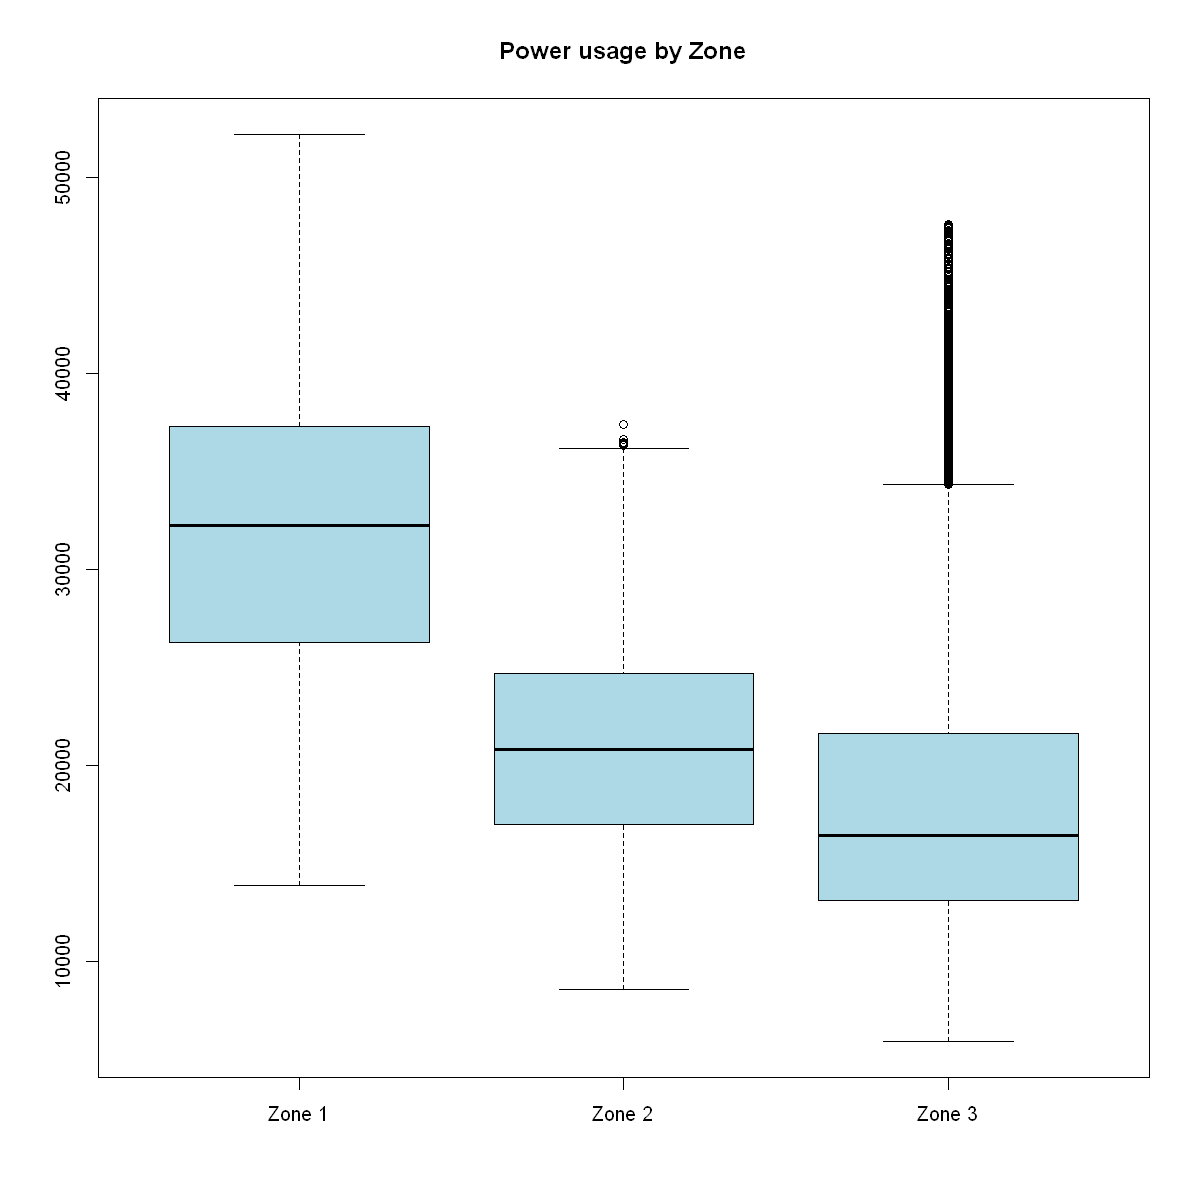

In [16]:
#boxplot power consumtpion per area
boxplot(consumption$PowerConsumption_Zone1, consumption$PowerConsumption_Zone2, consumption$PowerConsumption_Zone3, col='lightblue', main="Power usage by Zone", names = c("Zone 1","Zone 2","Zone 3"))


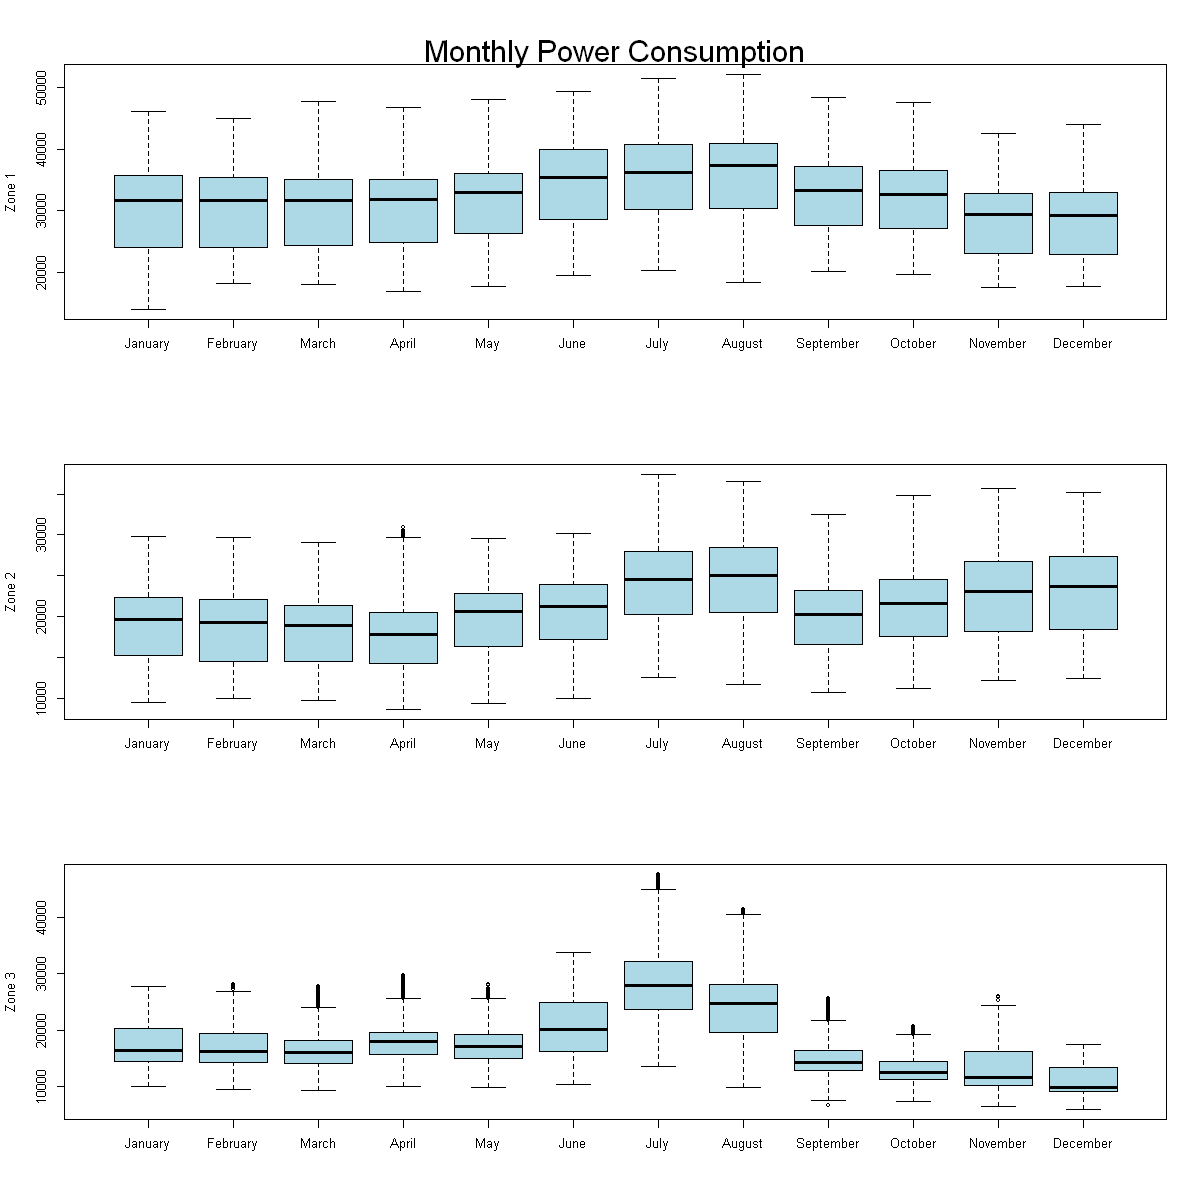

In [17]:
#time series per month
#order boxplot: https://r-graph-gallery.com/9-ordered-boxplot.html
consumption$Months <- factor(consumption$Months, levels=c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
par(mfrow=c(3,1))
boxplot(consumption$PowerConsumption_Zone1~consumption$Months, col='lightblue', ylab="Zone 1", xlab="")
mtext("Monthly Power Consumption", outer=FALSE, cex = 1.5)
boxplot(consumption$PowerConsumption_Zone2~consumption$Months, col='lightblue', ylab="Zone 2", xlab="")
boxplot(consumption$PowerConsumption_Zone3~consumption$Months, col='lightblue', ylab="Zone 3", xlab="")

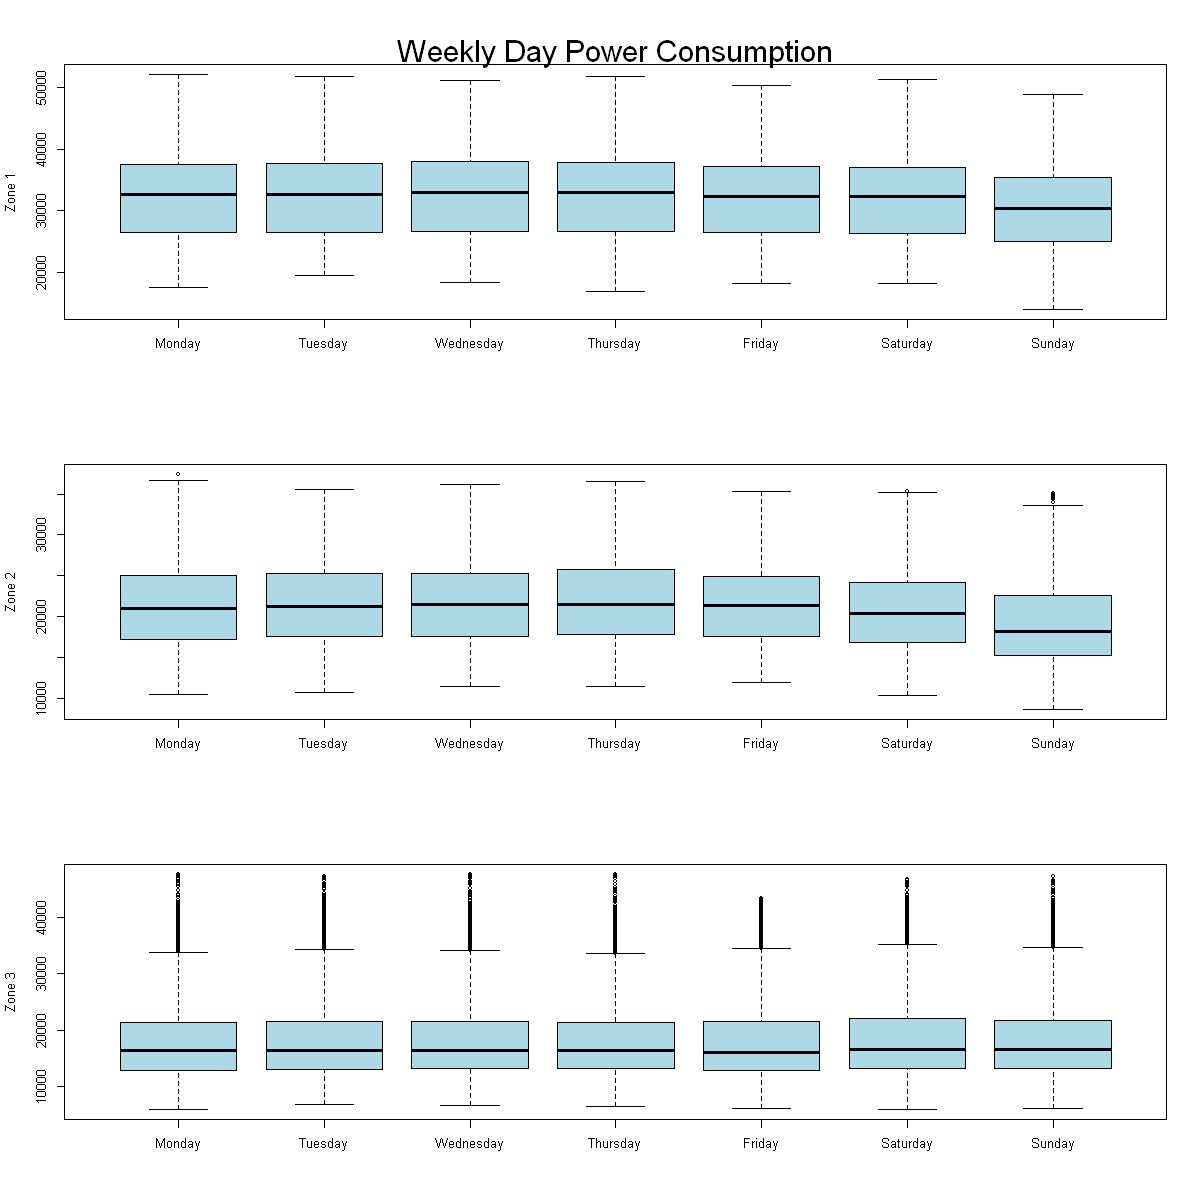

In [18]:
#time series per day of the week
consumption$Weekdays <- factor(consumption$Weekdays, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
par(mfrow=c(3,1))
boxplot(consumption$PowerConsumption_Zone1~consumption$Weekdays, col='lightblue', ylab="Zone 1", xlab="")
mtext("Weekly Day Power Consumption", outer=FALSE, cex = 1.5)
boxplot(consumption$PowerConsumption_Zone2~consumption$Weekdays, col='lightblue', ylab="Zone 2", xlab="")
boxplot(consumption$PowerConsumption_Zone3~consumption$Weekdays, col='lightblue', ylab="Zone 3", xlab="")

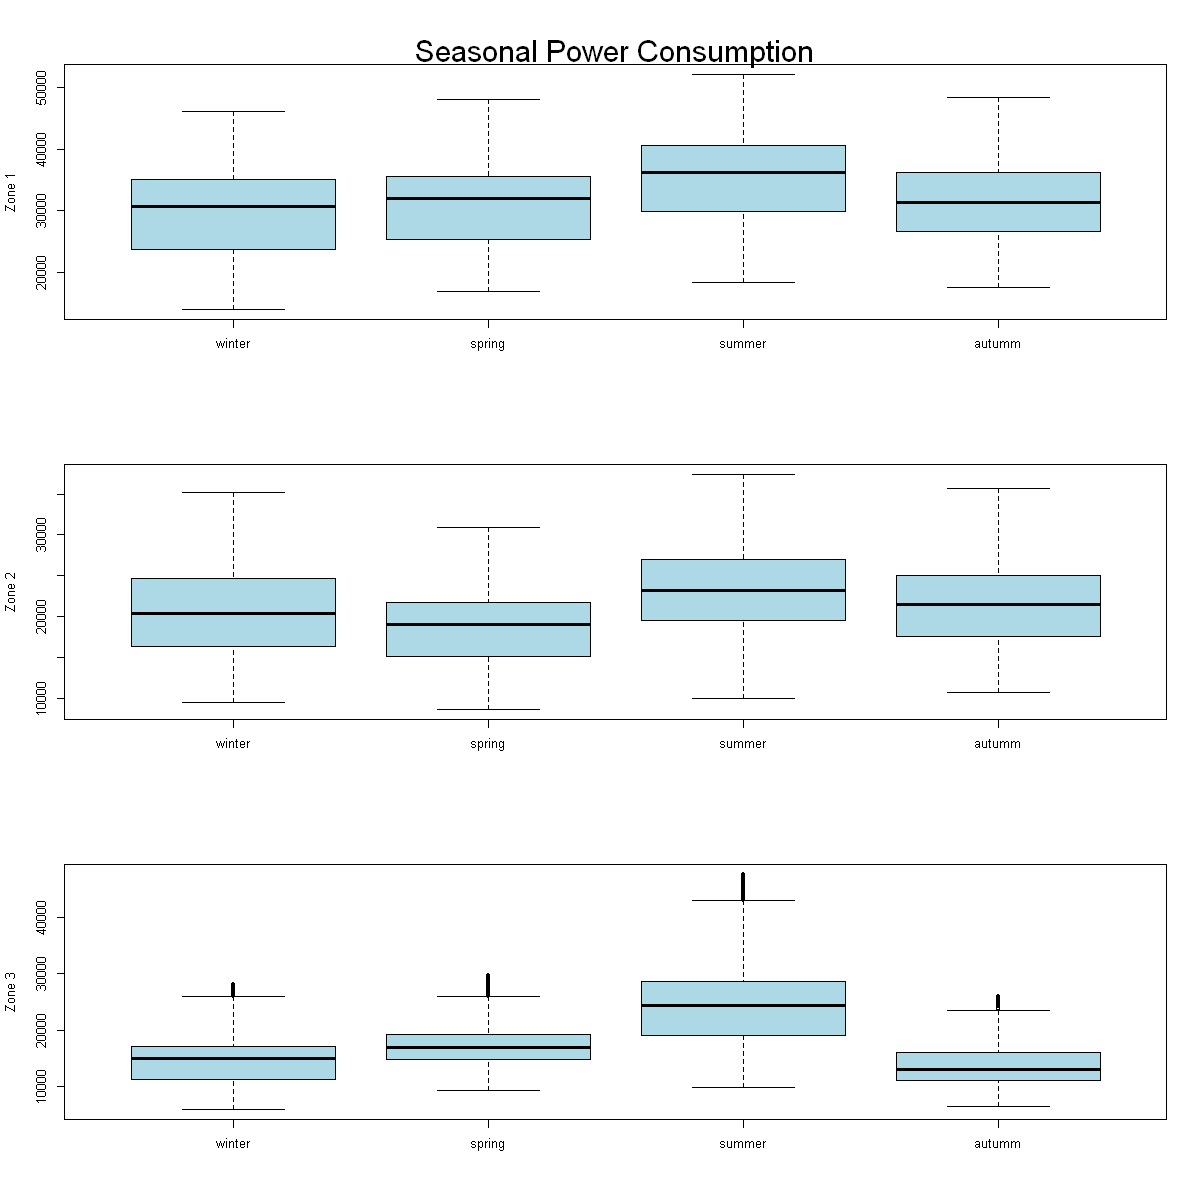

In [19]:
#time series per season
consumption$Season <- factor(consumption$Season, levels=c('winter', 'spring', 'summer', 'autumm'))
par(mfrow=c(3,1))
boxplot(consumption$PowerConsumption_Zone1~consumption$Season, col='lightblue', ylab="Zone 1", xlab="")
mtext("Seasonal Power Consumption", outer=FALSE, cex = 1.5)
boxplot(consumption$PowerConsumption_Zone2~consumption$Season, col='lightblue', ylab="Zone 2", xlab="")
boxplot(consumption$PowerConsumption_Zone3~consumption$Season, col='lightblue', ylab="Zone 3", xlab="")

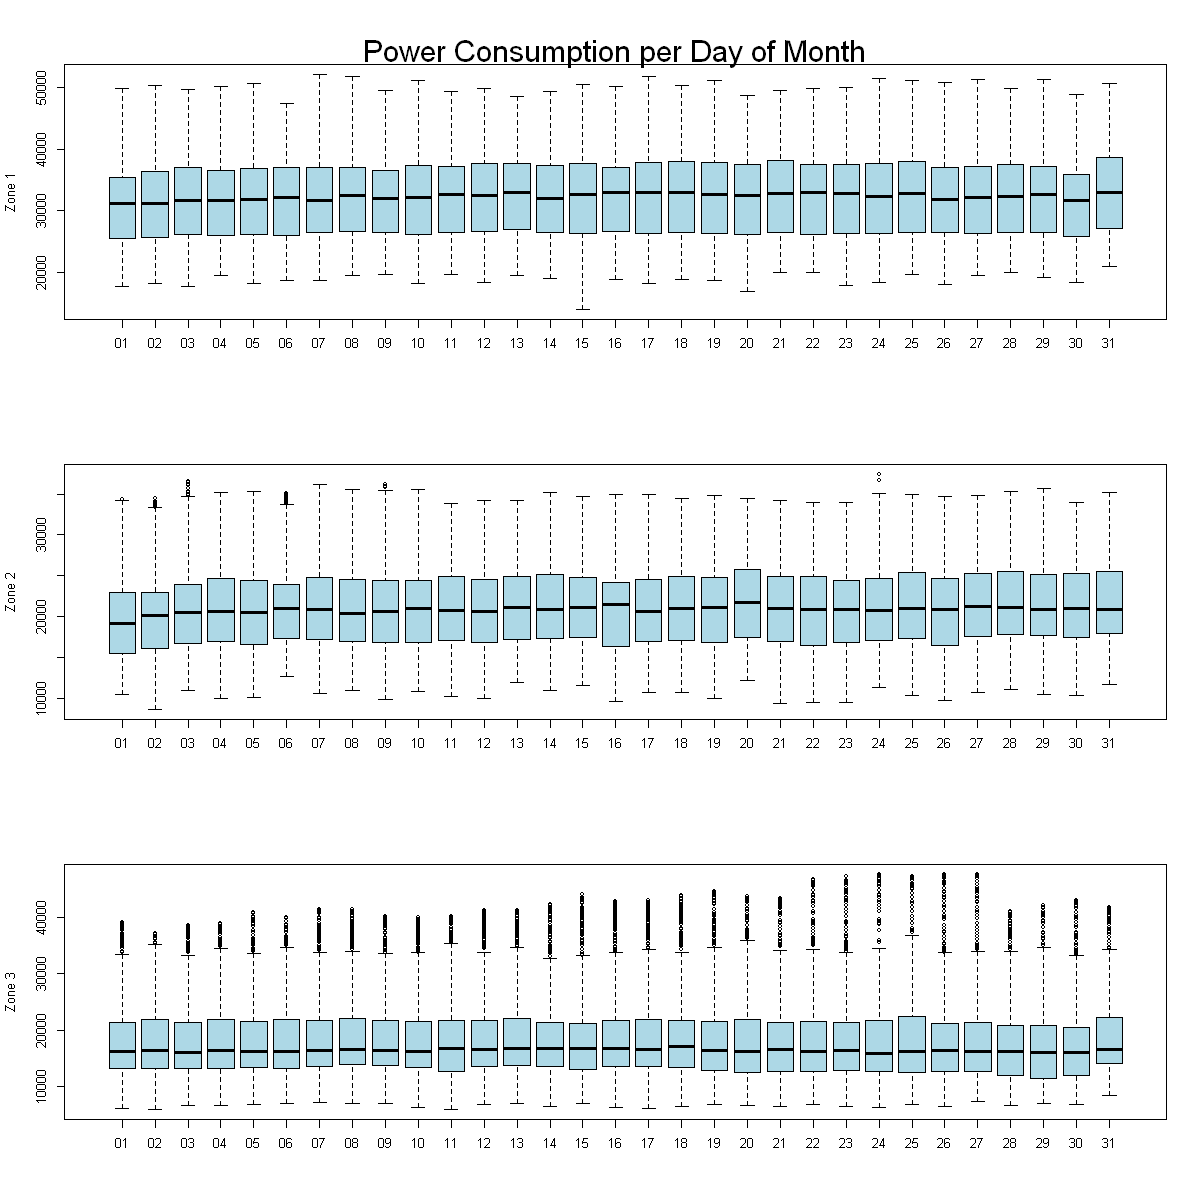

In [20]:
#time series per day of the month
#Dataset$day_number <- factor(Dataset$day_number, levels=c('winter', 'spring', 'summer', 'autumm'))
par(mfrow=c(3,1))
boxplot(consumption$PowerConsumption_Zone1~consumption$Day_number, col='lightblue', ylab="Zone 1", xlab="")
mtext("Power Consumption per Day of Month", outer=FALSE, cex = 1.5)
boxplot(consumption$PowerConsumption_Zone2~consumption$Day_number, col='lightblue', ylab="Zone 2", xlab="")
boxplot(consumption$PowerConsumption_Zone3~consumption$Day_number, col='lightblue', ylab="Zone 3", xlab="")

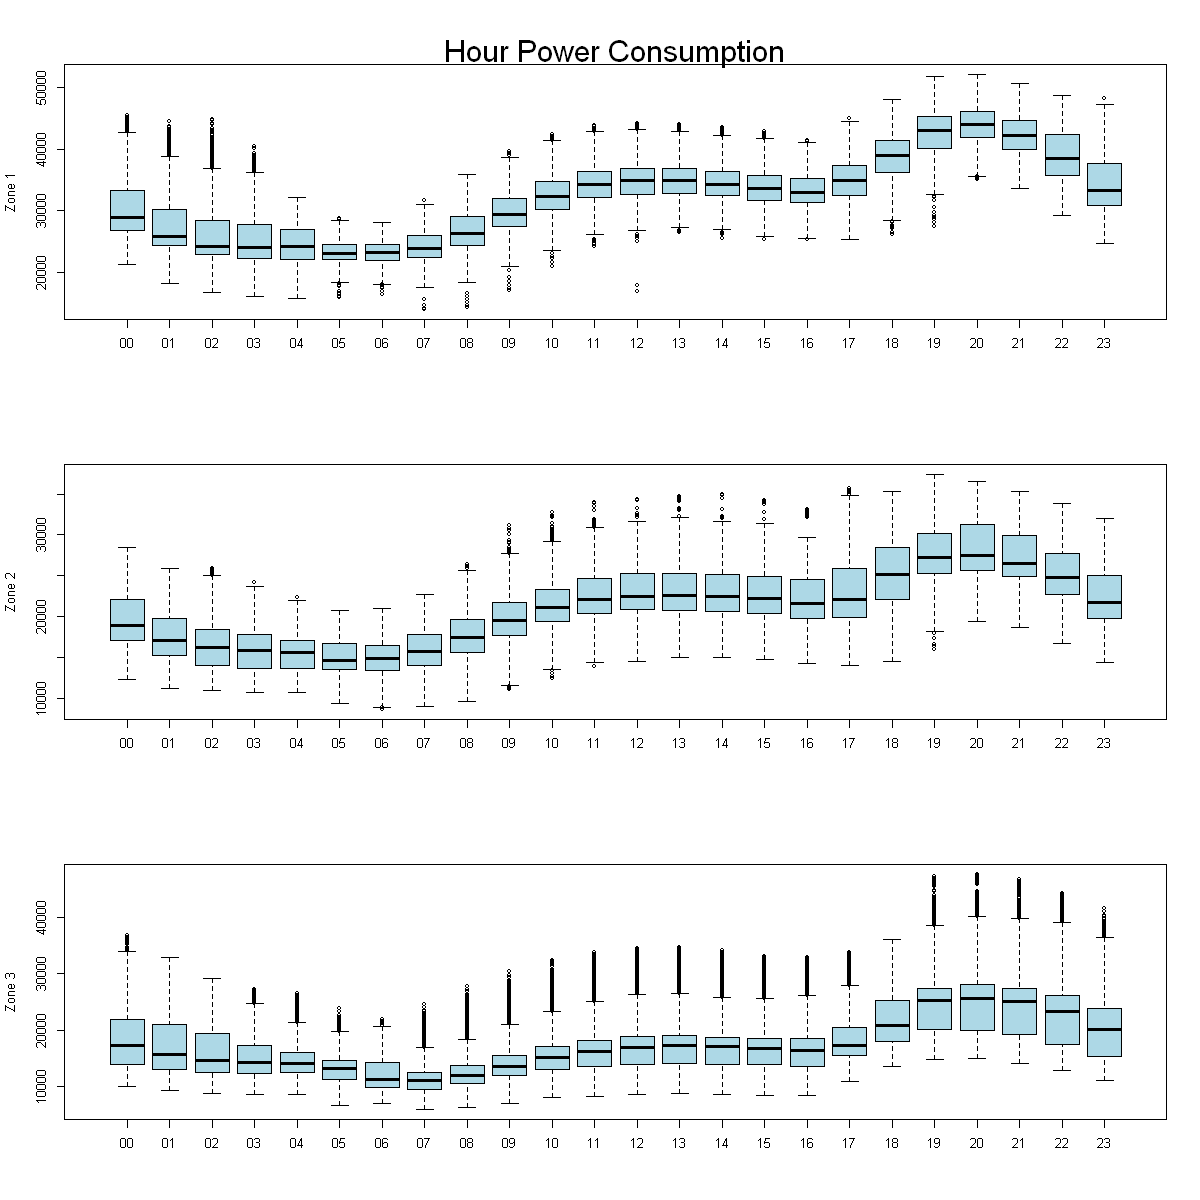

In [21]:
#time series per hour
par(mfrow=c(3,1))
boxplot(consumption$PowerConsumption_Zone1~consumption$Hour, col='lightblue', ylab="Zone 1", xlab="")
mtext("Hour Power Consumption", outer=FALSE, cex = 1.5)
boxplot(consumption$PowerConsumption_Zone2~consumption$Hour, col='lightblue', ylab="Zone 2", xlab="")
boxplot(consumption$PowerConsumption_Zone3~consumption$Hour, col='lightblue', ylab="Zone 3", xlab="")

## Correlation Analysis

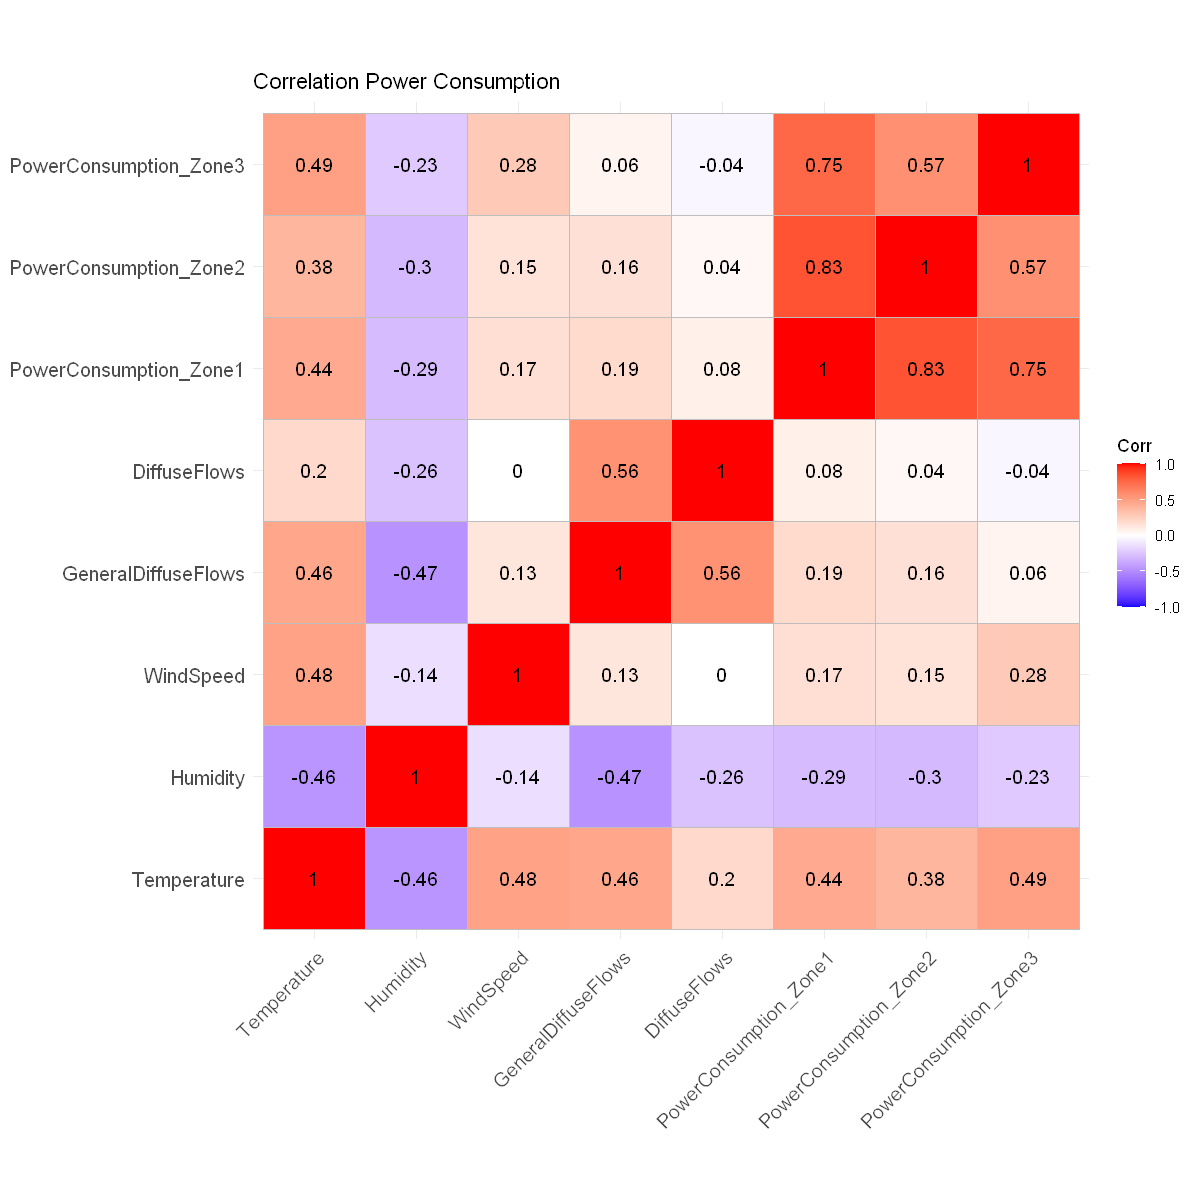

In [22]:
NumericoVariables <- names(which(sapply(consumption, is.numeric)))
FinalCorrelation <- cor(consumption[,NumericoVariables], use = 'pairwise.complete.obs')
ggcorrplot(FinalCorrelation, title="Correlation Power Consumption", lab = TRUE)

In [23]:
#increase size
options(repr.plot.width=15, repr.plot.height=5)

Warning message:
"`label_number_si()` was deprecated in scales 1.2.0.
ℹ Please use the `scale_cut` argument of `label_number()` instead."


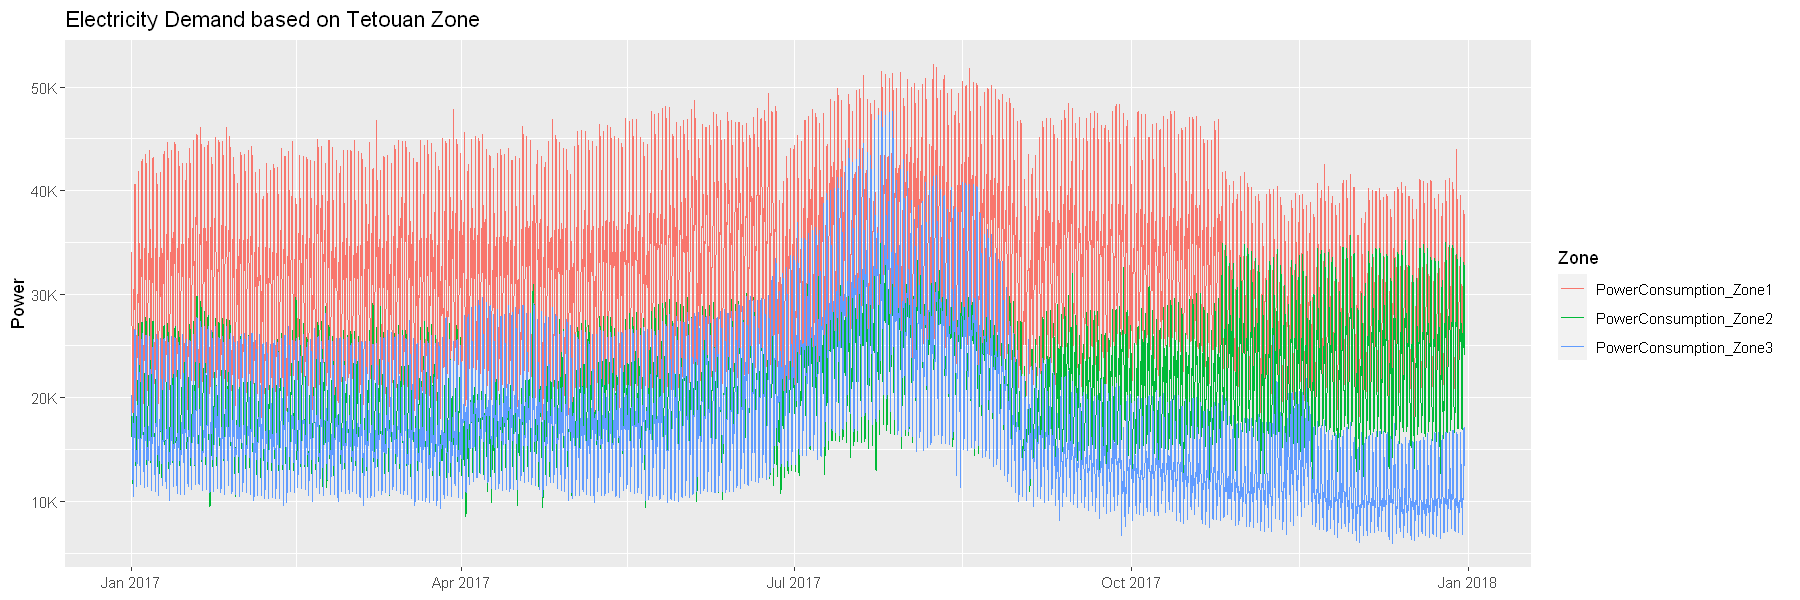

In [24]:
consumption %>% 
  select(Datetime, contains("Zone")) %>% 
  pivot_longer(-Datetime) %>% 
  ggplot(aes(Datetime, value)) +
  geom_line(aes(color = name)) +
  scale_y_continuous(labels = scales::label_number_si()) +
  labs(
    x = NULL,
    y = "Power",
    color = "Zone"
  ) +
  ggtitle("Electricity Demand based on Tetouan Zone") -> p1
p1

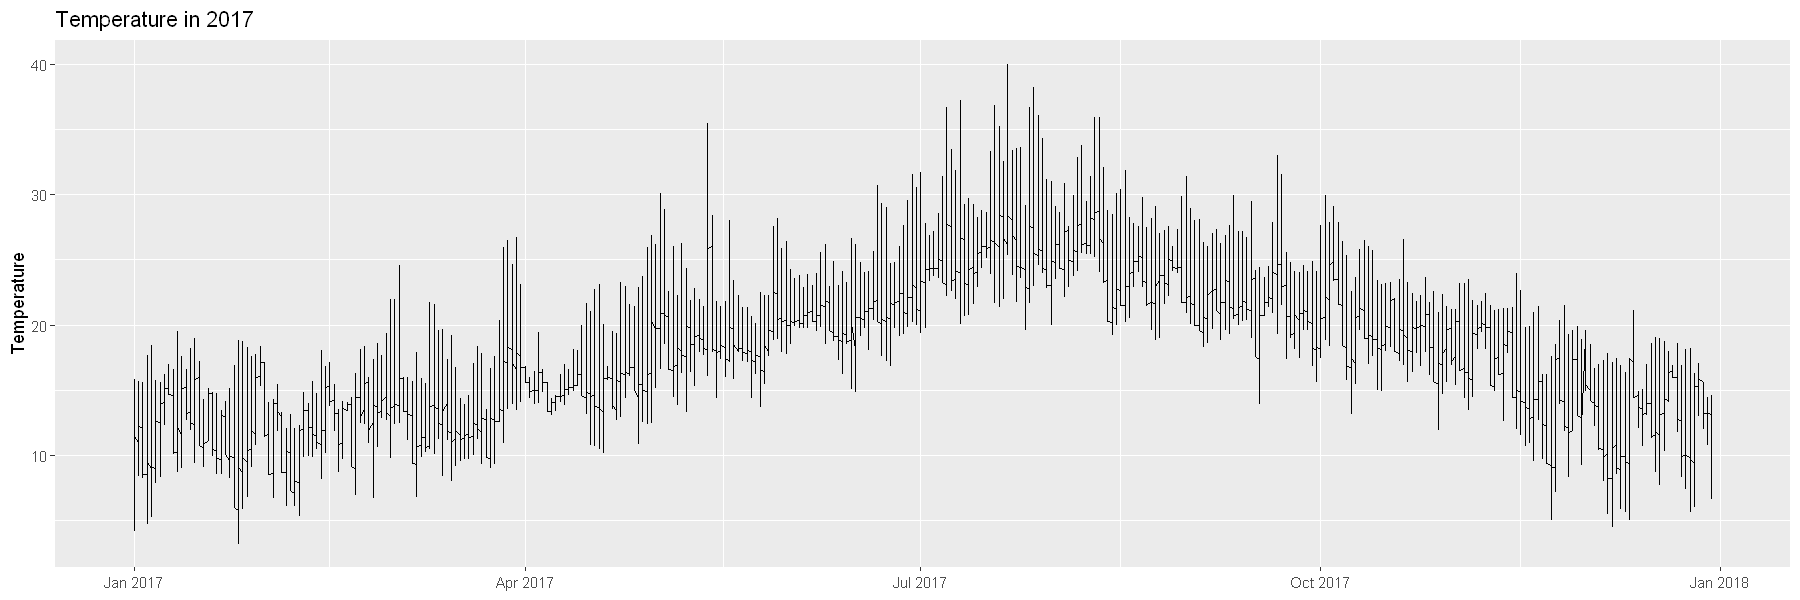

In [25]:
consumption %>% 
  ggplot(aes(date(Datetime), Temperature)) +
  geom_line() +
  labs(
    x = NULL,
    y = "Temperature"
  ) +
  ggtitle("Temperature in 2017") -> p2
p2

In [26]:
#decide between sum of three zones or just one
plot <- consumption %>%
  index_by(Day = date(Datetime)) %>%
  summarise(
    PowerConsumption = sum(PowerConsumption_Zone1 + PowerConsumption_Zone2 + PowerConsumption_Zone3 ) / 1e3,
    Temperature = max(Temperature)
  ) %>%
  mutate(Day_Type = case_when(
    wday(Day) %in% 2:6 ~ "Weekday",
    TRUE ~ "Weekend"
  ))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


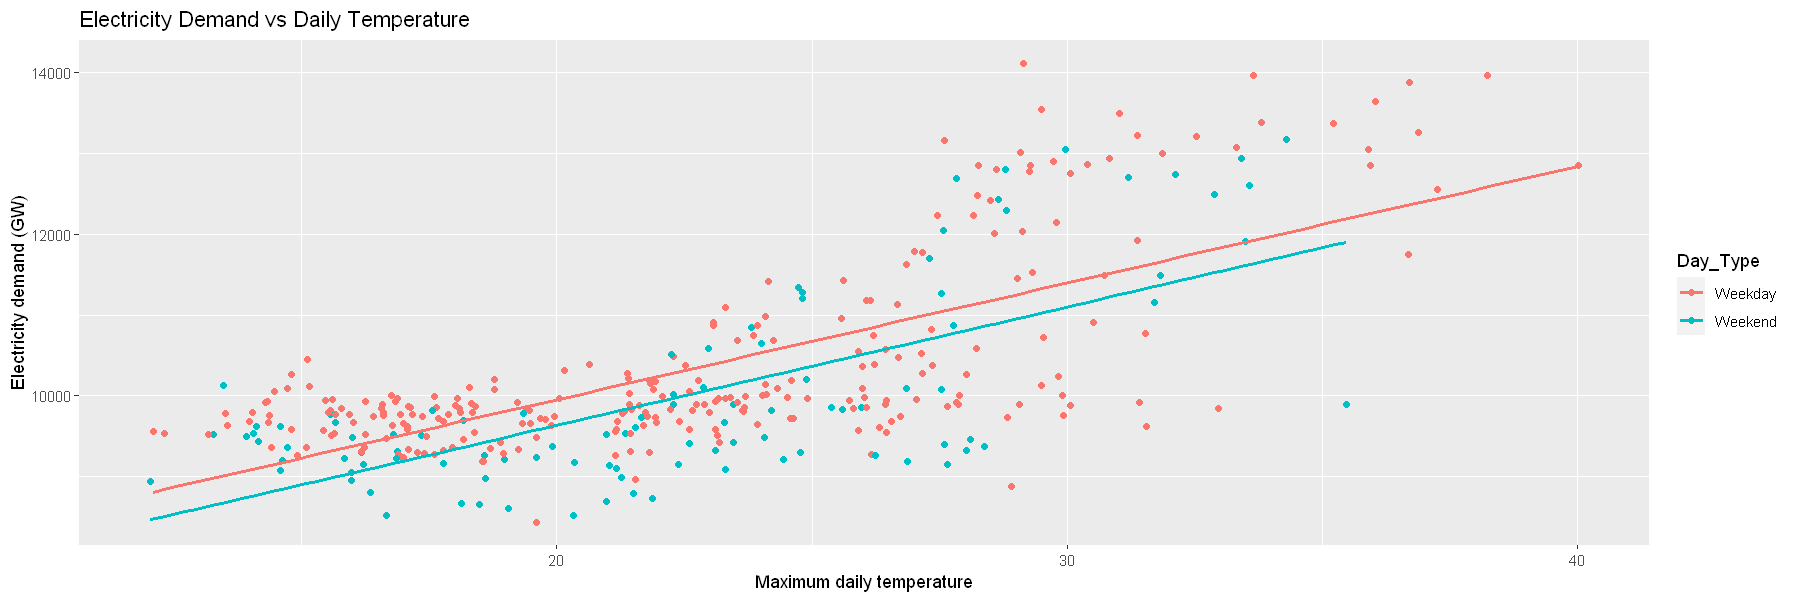

In [27]:
plot %>%
  ggplot(aes(x = Temperature, y = PowerConsumption, colour = Day_Type)) +
  geom_point() +
  labs(y = "Electricity demand (GW)",
       x = "Maximum daily temperature") +
  geom_smooth(method = "lm", se = FALSE) +
  ggtitle("Electricity Demand vs Daily Temperature")

## Dynamic Regression Model

### Zone1

In [28]:
plot <- consumption %>%
  index_by(Day = date(Datetime)) %>%
  summarise(
    PowerConsumption = sum(PowerConsumption_Zone1) / 1e3,
    Temperature = max(Temperature)
  ) %>%
  mutate(Day_Type = case_when(
    wday(Day) %in% 2:6 ~ "Weekday",
    TRUE ~ "Weekend"
  ))

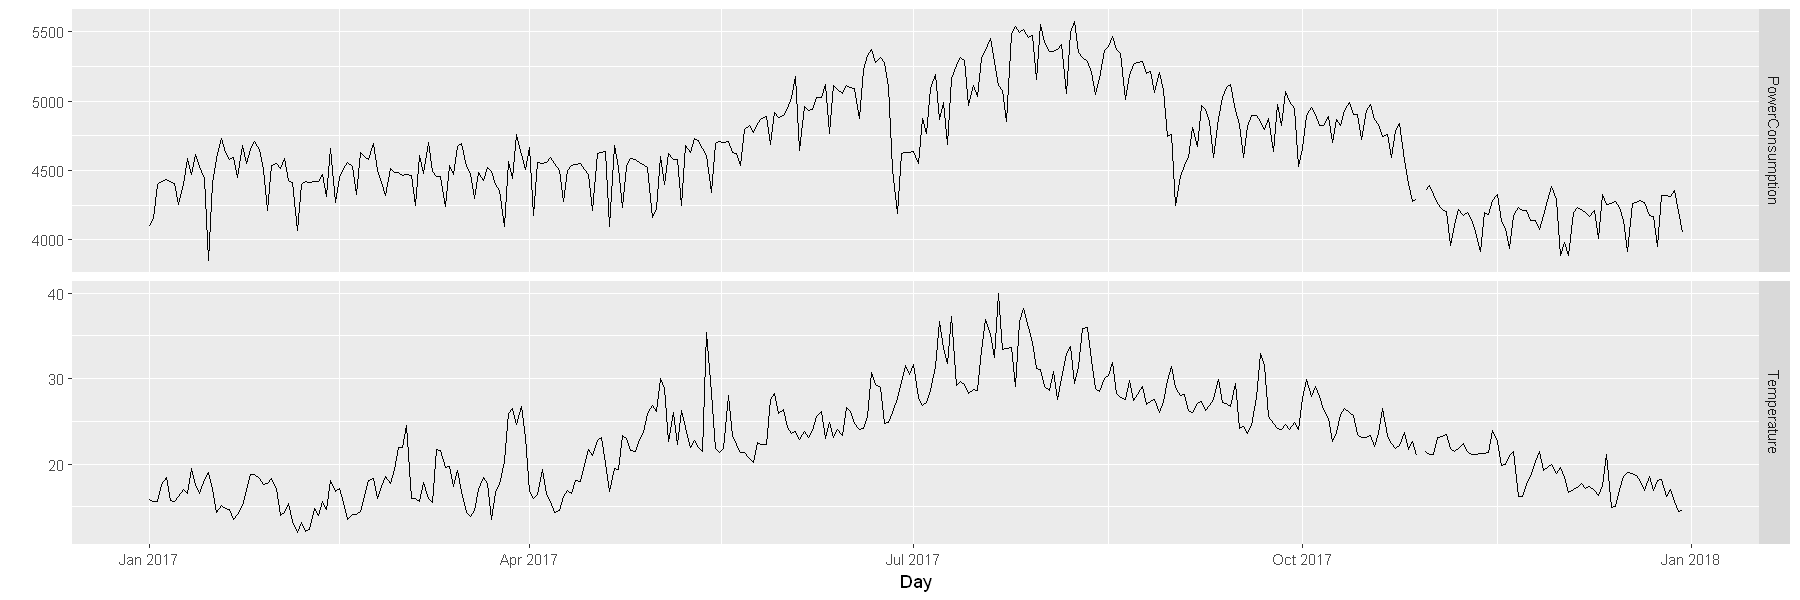

In [29]:
plot %>%
  pivot_longer(c(PowerConsumption, Temperature)) %>%
  ggplot(aes(x = Day, y = value)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") + ylab("")

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


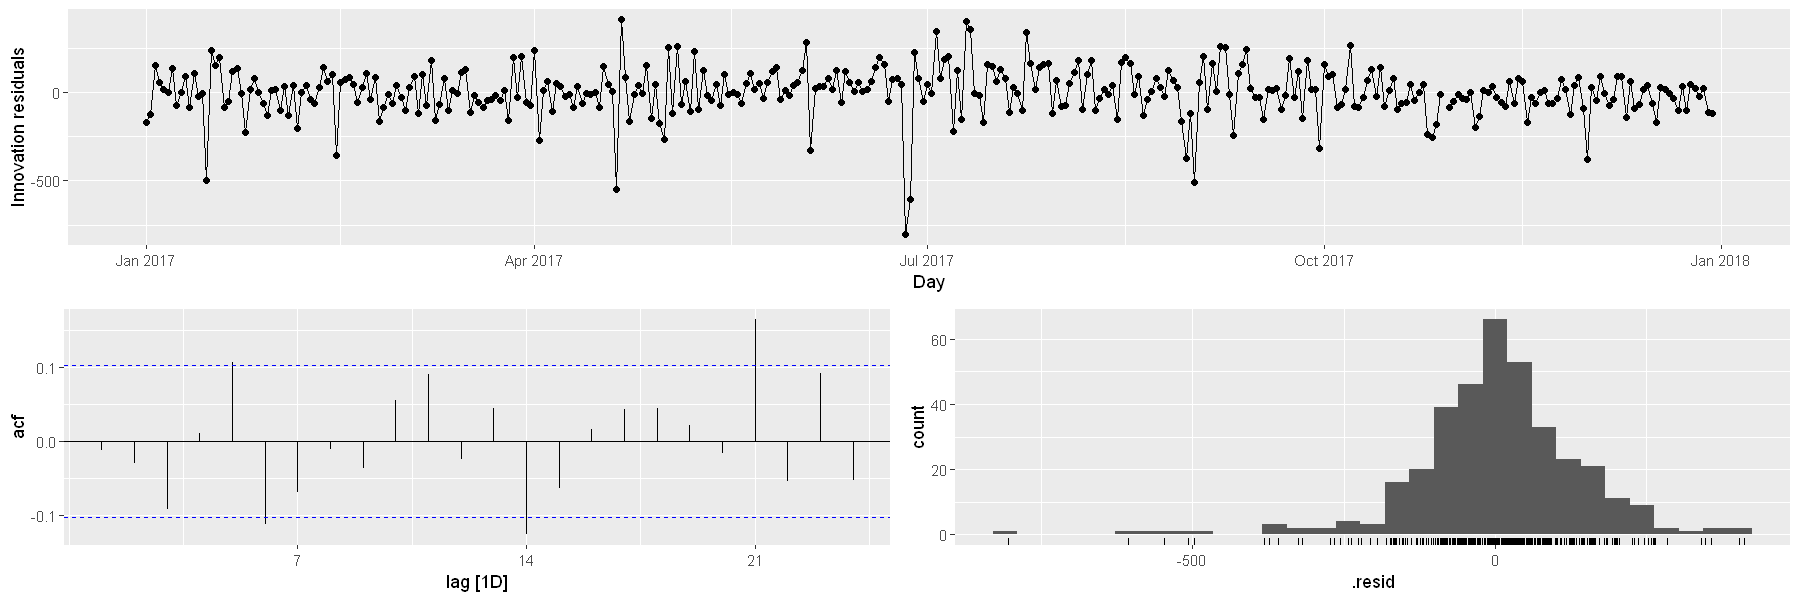

In [30]:
fit <- plot %>%
  model(ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) +
                (Day_Type == "Weekday")))
fit %>% gg_tsresiduals()

In [31]:
report(fit)

Series: PowerConsumption 
Model: LM w/ ARIMA(2,0,0)(2,0,0)[7] errors 

Coefficients:
         ar1     ar2    sar1    sar2  Temperature  I(Temperature^2)
      0.6197  0.2316  0.3364  0.2235       4.0007           -0.1070
s.e.  0.0515  0.0579  0.0560  0.0529      13.4569            0.2547
      Day_Type == "Weekday"TRUE  intercept
                       153.6066  4472.1201
s.e.                    30.7573   200.1669

sigma^2 estimated as 19639:  log likelihood=-2307.83
AIC=4633.67   AICc=4634.18   BIC=4668.74


In [32]:
augment(fit) %>%
  features(.innov, ljung_box, dof = 9, lag = 14)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
"ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) + (Day_Type == ""Weekday""))",23.39644,0.00028346


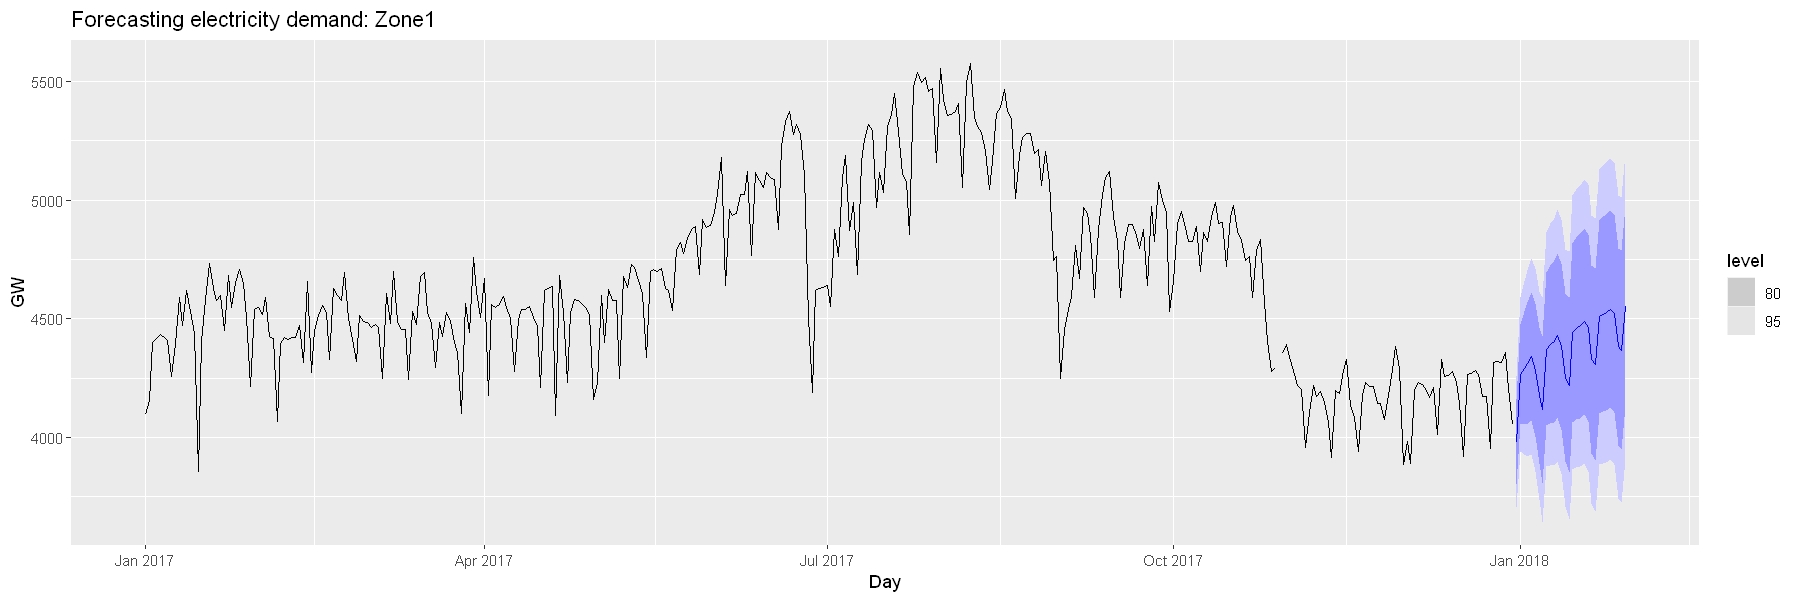

In [33]:
future <- new_data(plot, 30) %>%
  mutate(
    Temperature = 12,
    Day_Type = case_when(
      wday(Day) %in% 2:6 ~ "Weekday",
      TRUE ~ "Weekend"
    )
  )
forecast(fit, future) %>%
  autoplot(plot) +
  labs(title="Forecasting electricity demand: Zone1",
       y="GW")

### Zone2

In [34]:
plot2 <- consumption %>%
  index_by(Day = date(Datetime)) %>%
  summarise(
    PowerConsumption = sum(PowerConsumption_Zone2) / 1e3,
    Temperature = max(Temperature)
  ) %>%
  mutate(Day_Type = case_when(
    wday(Day) %in% 2:6 ~ "Weekday",
    TRUE ~ "Weekend"
  ))

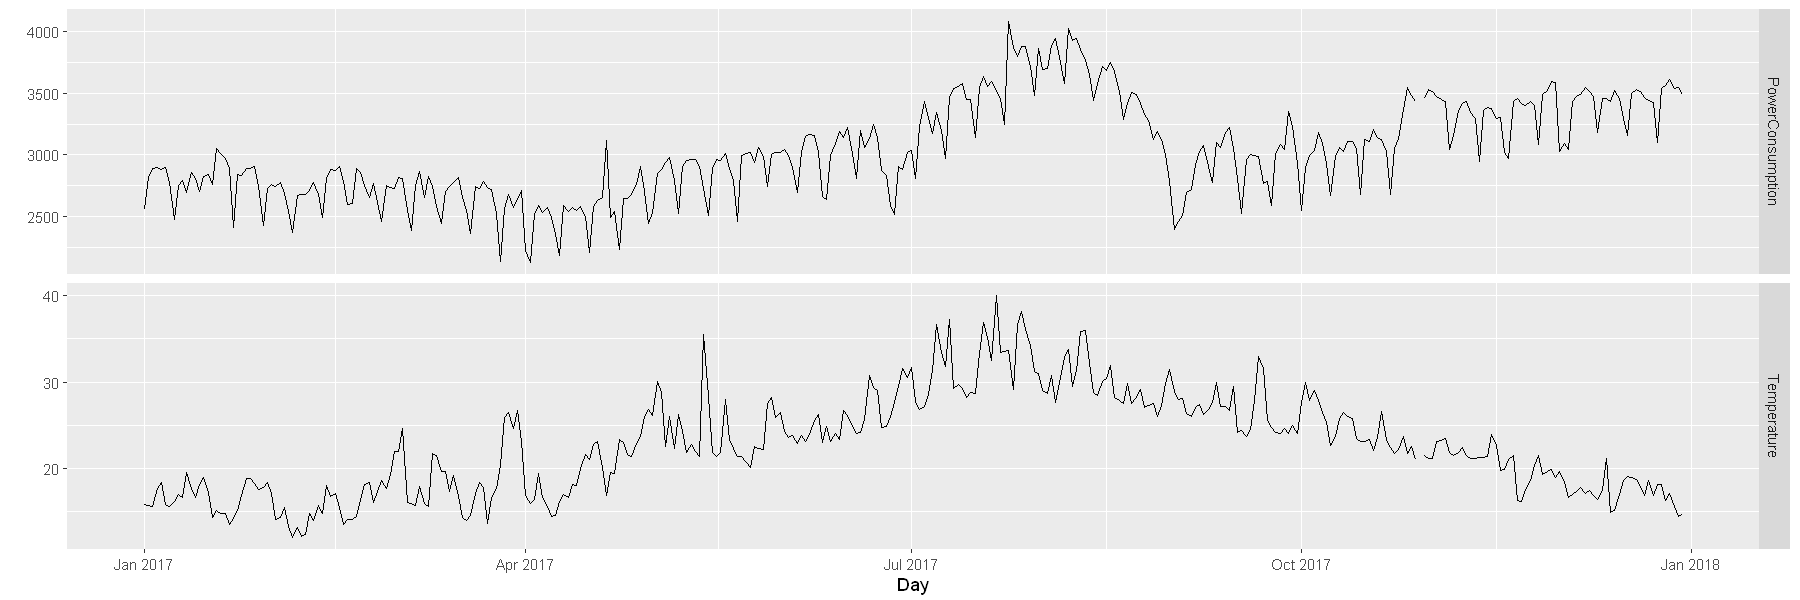

In [35]:
plot2 %>%
  pivot_longer(c(PowerConsumption, Temperature)) %>%
  ggplot(aes(x = Day, y = value)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") + ylab("")

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


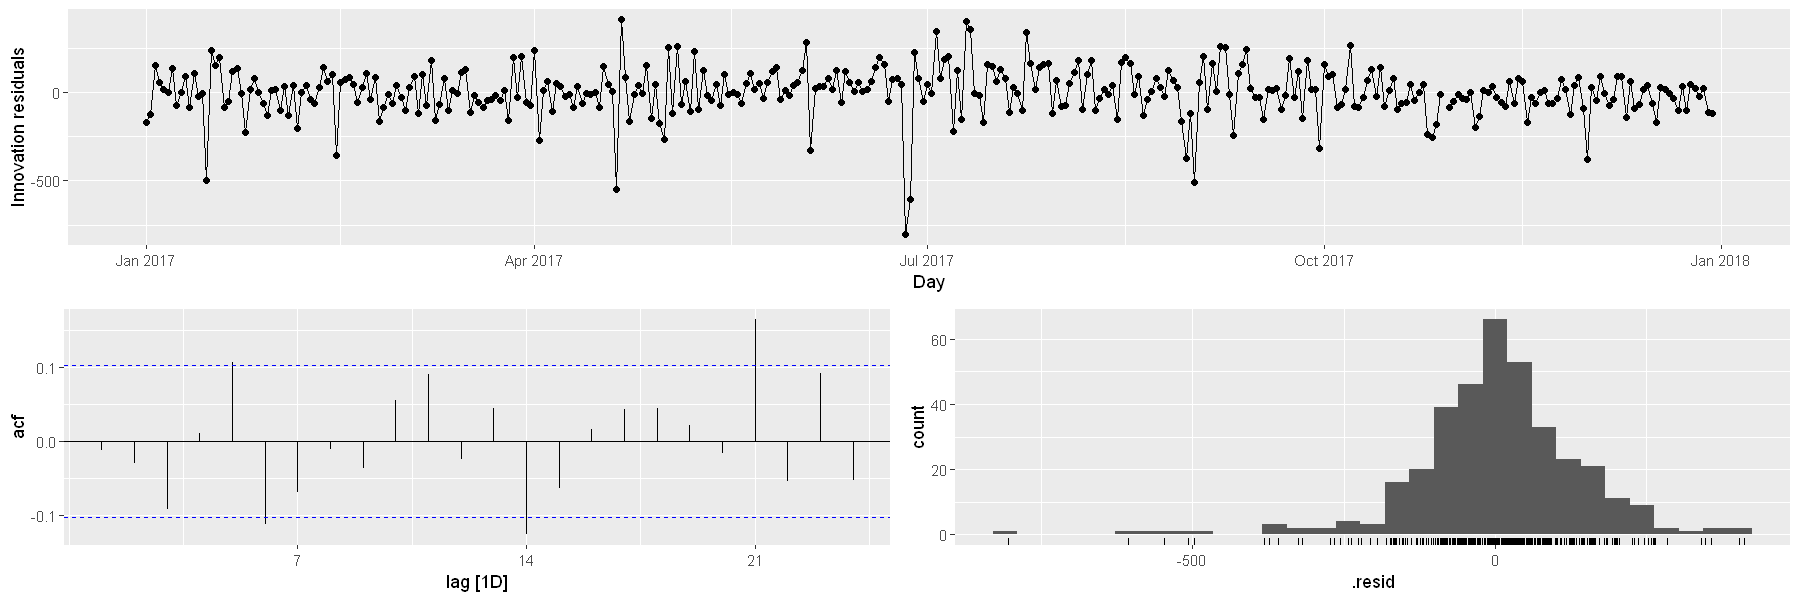

In [36]:
fit2 <- plot2 %>%
  model(ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) +
                (Day_Type == "Weekday")))
fit %>% gg_tsresiduals()

In [37]:
report(fit2)

Series: PowerConsumption 
Model: LM w/ ARIMA(2,1,0)(2,0,0)[7] errors 

Coefficients:
          ar1      ar2    sar1    sar2  Temperature  I(Temperature^2)
      -0.3575  -0.1772  0.2472  0.2912      10.2366           -0.2475
s.e.   0.0545   0.0525  0.0505  0.0513      12.3148            0.2357
      Day_Type == "Weekday"TRUE
                       246.0066
s.e.                    26.7415

sigma^2 estimated as 16667:  log likelihood=-2271.58
AIC=4559.17   AICc=4559.57   BIC=4590.32


In [38]:
augment(fit2) %>%
  features(.innov, ljung_box, dof = 9, lag = 14)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
"ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) + (Day_Type == ""Weekday""))",16.2497,0.006166173


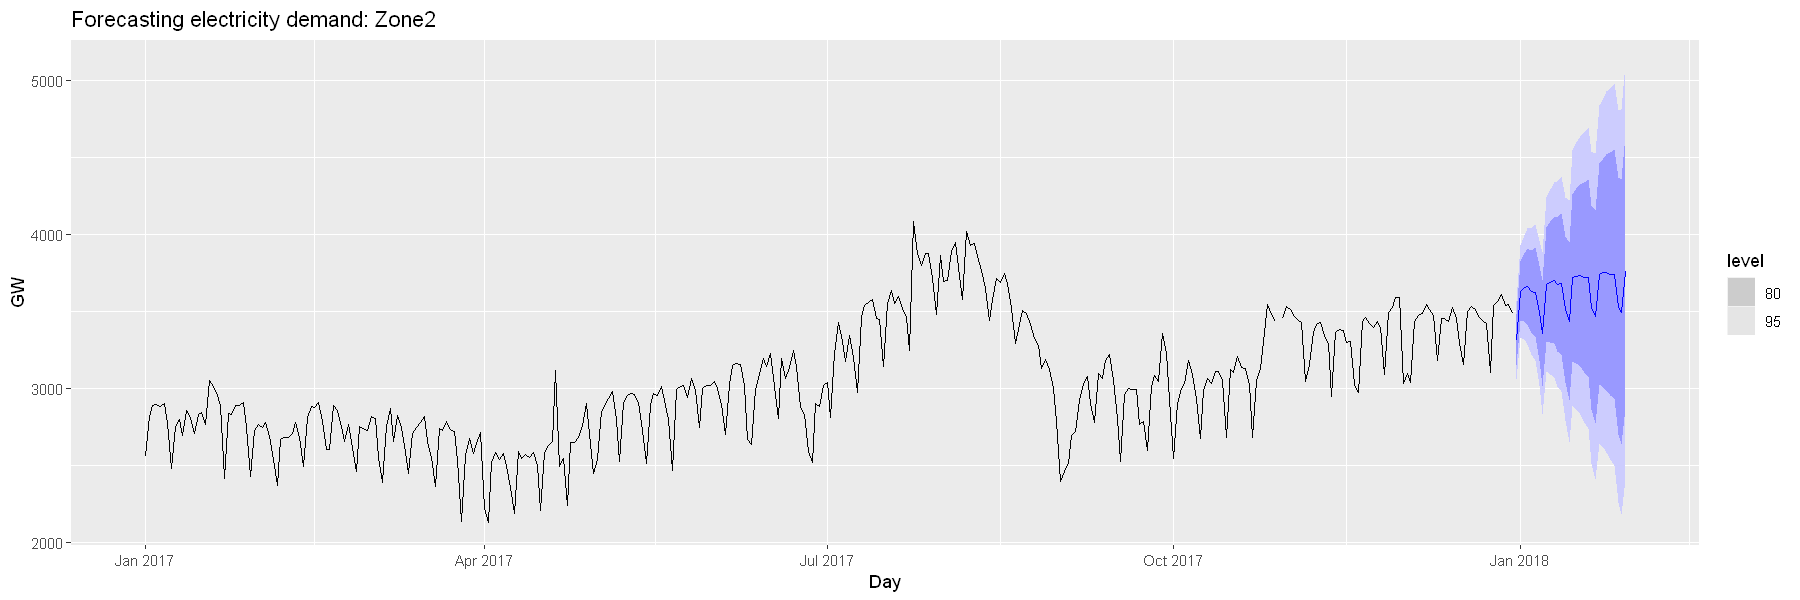

In [39]:
future2 <- new_data(plot2, 30) %>%
  mutate(
    Temperature = 12,
    Day_Type = case_when(
      wday(Day) %in% 2:6 ~ "Weekday",
      TRUE ~ "Weekend"
    )
  )
forecast(fit2, future2) %>%
  autoplot(plot2) +
  labs(title="Forecasting electricity demand: Zone2",
       y="GW")

### Zone3

In [40]:
plot3 <- consumption %>%
  index_by(Day = date(Datetime)) %>%
  summarise(
    PowerConsumption = sum(PowerConsumption_Zone3) / 1e3,
    Temperature = max(Temperature)
  ) %>%
  mutate(Day_Type = case_when(
    wday(Day) %in% 2:6 ~ "Weekday",
    TRUE ~ "Weekend"
  ))

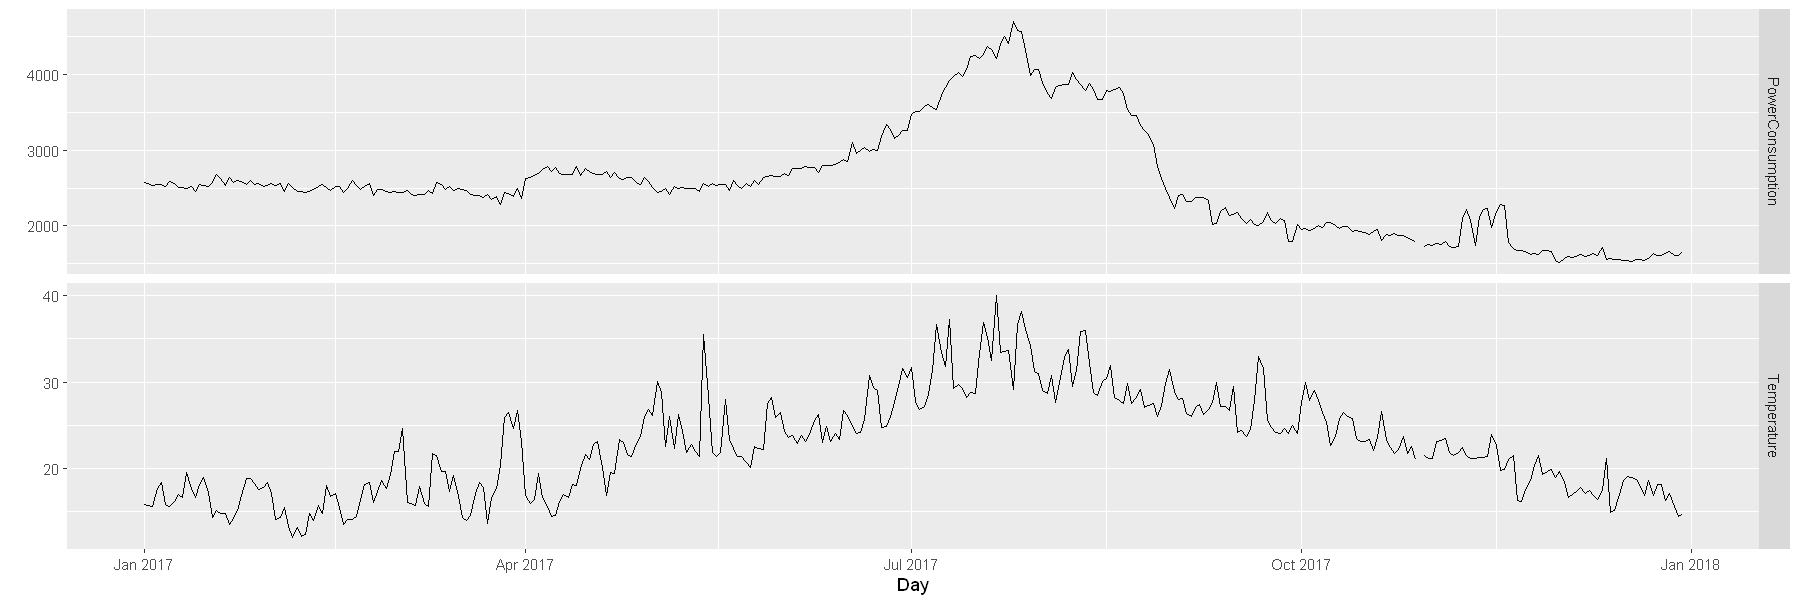

In [41]:
plot3 %>%
  pivot_longer(c(PowerConsumption, Temperature)) %>%
  ggplot(aes(x = Day, y = value)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") + ylab("")

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


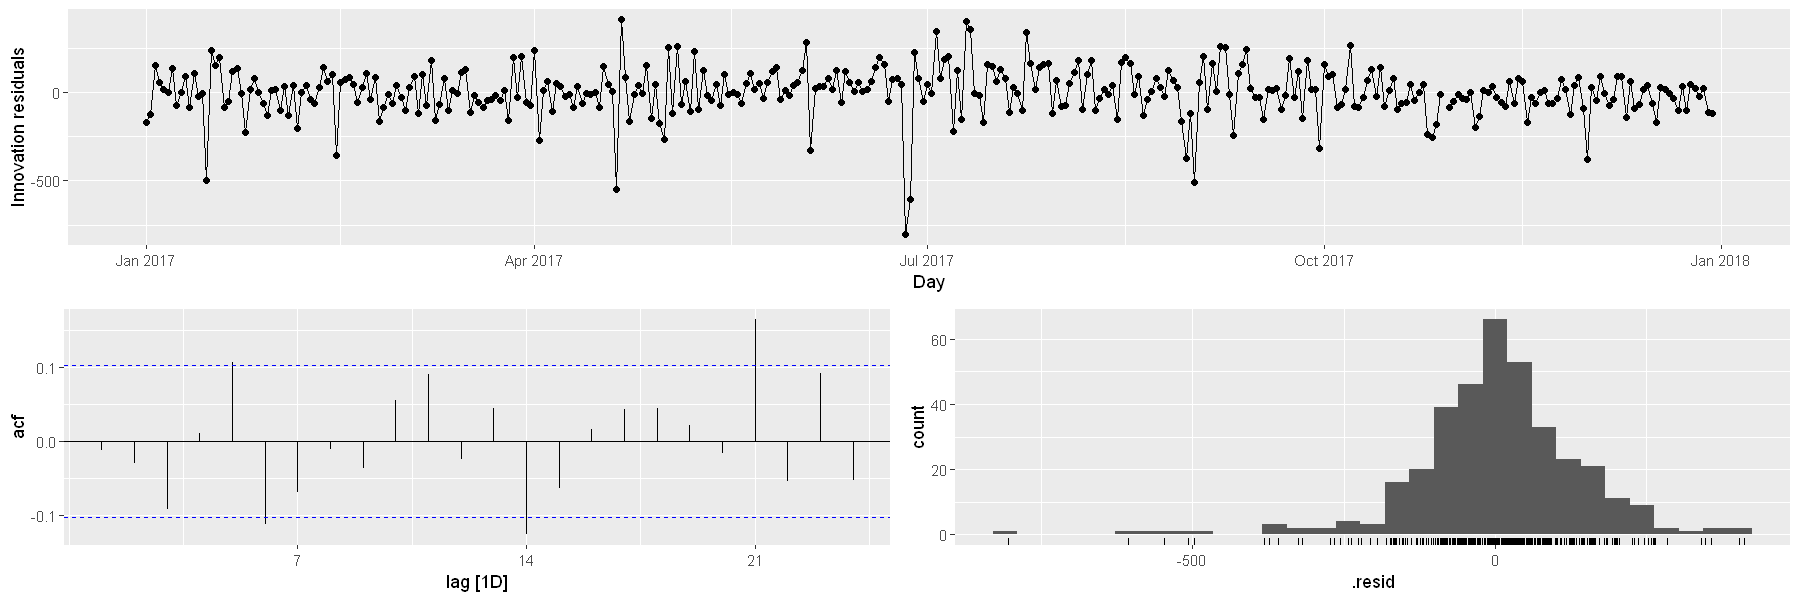

In [42]:
fit3 <- plot3 %>%
  model(ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) +
                (Day_Type == "Weekday")))
fit %>% gg_tsresiduals()

In [43]:
report(fit3)

Series: PowerConsumption 
Model: LM w/ ARIMA(0,1,0)(0,0,2)[7] errors 

Coefficients:
         sma1    sma2  Temperature  I(Temperature^2)  Day_Type == "Weekday"TRUE
      -0.0016  0.1137      -4.3894           -0.0144                   -40.7101
s.e.   0.0529  0.0472       8.6266            0.1618                     9.5381

sigma^2 estimated as 7661:  log likelihood=-2130.95
AIC=4273.89   AICc=4274.13   BIC=4297.26


In [44]:
augment(fit3) %>%
  features(.innov, ljung_box, dof = 9, lag = 14)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
"ARIMA(PowerConsumption ~ Temperature + I(Temperature^2) + (Day_Type == ""Weekday""))",41.13463,8.813175e-08


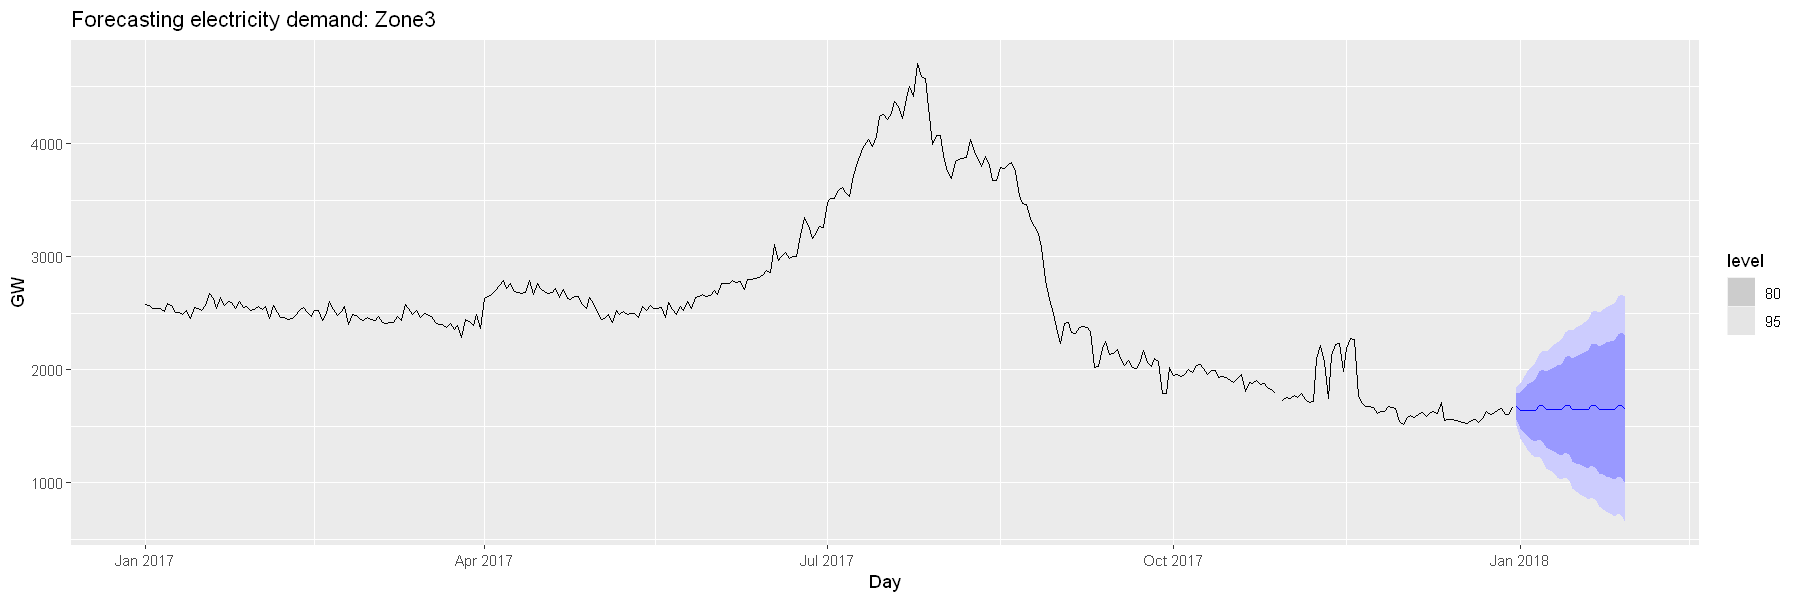

In [45]:
future3 <- new_data(plot3, 30) %>%
  mutate(
    Temperature = 12,
    Day_Type = case_when(
      wday(Day) %in% 2:6 ~ "Weekday",
      TRUE ~ "Weekend"
    )
  )
forecast(fit3, future3) %>%
  autoplot(plot3) +
  labs(title="Forecasting electricity demand: Zone3",
       y="GW")